In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
labels = ["The Eiffel Tower","airplane","ambulance","angel","ant","anvil","apple","axe","backpack","banana","bandage","bat","bear","bee","bicycle","bird","book","boomerang","bottlecap","bread","broccoli","broom","campfire","car","cat","chair","chandelier","circle","clock","cloud","computer","crown","cup","dog","donut","door","duck","dumbbell","envelope","fish","flower","fork","guitar","hat","helmet","hourglass","house","iceCream","key","knife","leg","lightning","line","mountain","mouse","mushroom","pencil","remoteControl","screwdriver","shoe","skull","spider","spoon","star","strawberry","string bean","suitcase","sun","sword","t-shirt","table","teddy-bear","toilet","tornado","tree","umbrella","van","wine bottle","wine glass","zigzag"]
X_data_1 = np.empty((0,28,28))
Y_label_1 = []
check = []
for filename in os.listdir("/content/drive/MyDrive/data"):
  for i in range(len(labels)):
    if filename.endswith(labels[i]+".npy"):
      if i in check:
        print(i)
        
        continue
      check.append(i)
      images = np.load("/content/drive/MyDrive/data/" + filename)
      images_1 = images[:6000]
      images_1 = np.reshape(images_1,(6000,28,28))
      images_1 = images_1.astype("float32")/255

      X_data_1 = np.vstack((X_data_1,images_1))
      Y_label_1 = Y_label_1+[i]*6000

12


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(X_data_1.shape)

(480000, 28, 28)


In [ ]:
print(len(Y_label_1))

480000


In [ ]:
X_data = X_data_1
Y_label = Y_label_1

9


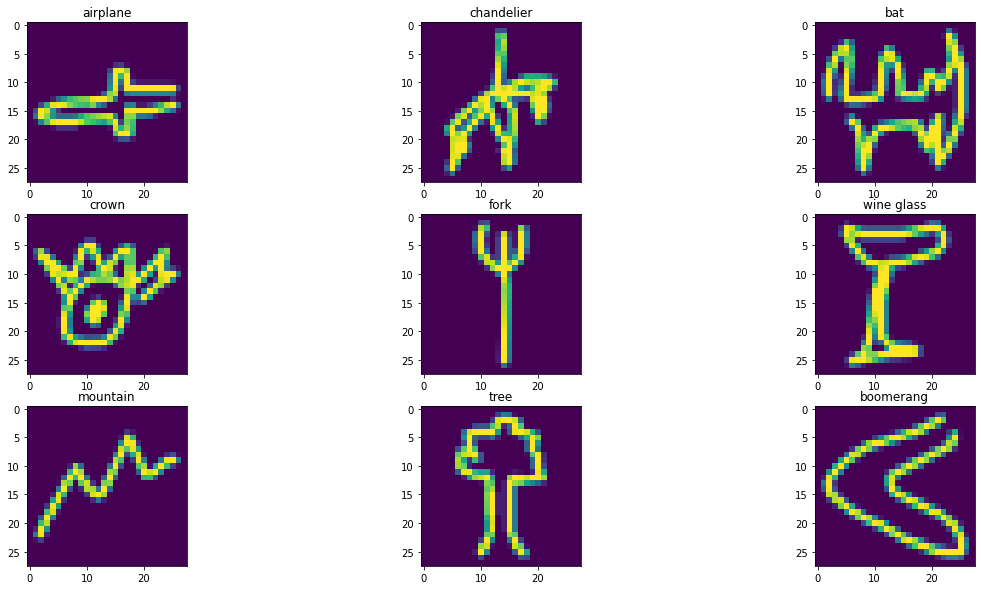

In [ ]:
import matplotlib.pyplot as plt
import random

print(random.randint(3, 9))
n=9
plt.figure(figsize=(20,10))
for i in range(n):
  j = random.randint(0,len(Y_label_1) )
  plt.subplot(330+1+i)
  plt.imshow(X_data[j])
  plt.title(labels[Y_label[j]])
plt.show()

In [ ]:
# MLP
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

model = Sequential()
model.add(Conv2D(500, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(320, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(80, activation='softmax'))

In [ ]:
from keras.models import Sequential
from keras import layers

model = Sequential()
model.add(layers.Flatten(input_shape=[28,28]))
model.add(layers.Dense(500,activation="relu"))
model.add(layers.Dense(500,activation="relu"))
model.add(layers.Dense(500,activation="relu"))
model.add(layers.Dense(500,activation="relu"))
model.add(layers.Dense(256,activation="relu"))
model.add(layers.Dense(80,activation="softmax"))


In [ ]:
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

model = Sequential()
model.add(Conv2D(200, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

model.add(Conv2D(150, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(50, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(80, activation='softmax'))

In [ ]:
from keras import regularizers

# Define the L2 weight decay regularizer
weight_decay = 1e-4
l2_reg = regularizers.l2(weight_decay)

In [ ]:
# main model
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, ReLU

model = Sequential()
model.add(Conv2D(50,kernel_size = (3,3), input_shape = (28,28,1),padding = "same"))
model.add(BatchNormalization())
model.add(ReLU())

model.add(Conv2D(60,kernel_size = (3,3),padding = "same"))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(30,kernel_size = (3,3),padding = "same"))
model.add(BatchNormalization())
model.add(ReLU())

model.add(Conv2D(30,kernel_size = (3,3),padding = "same"))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(30,kernel_size = (3,3),padding = "same"))
model.add(BatchNormalization())
model.add(ReLU())


model.add(Flatten())
model.add(Dense(200,activation="relu",kernel_regularizer=l2_reg))
model.add(Dense(120,activation="relu",kernel_regularizer=l2_reg))
model.add(Dense(80,activation="softmax"))

In [ ]:
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, ReLU

model = Sequential()
model.add(Conv2D(300,kernel_size = (3,3), input_shape = (28,28,1),padding = "same"))
model.add(BatchNormalization())
model.add(ReLU())

model.add(Conv2D(200,kernel_size = (3,3),padding = "same"))
model.add(BatchNormalization())
model.add(ReLU())


model.add(Conv2D(100,kernel_size = (3,3),padding = "same"))
model.add(BatchNormalization())
model.add(ReLU())


model.add(Flatten())
model.add(Dense(200,activation="relu"))
model.add(Dense(120,activation="relu"))
model.add(Dense(80,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 50)        500       
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 50)       200       
 hNormalization)                                                 
                                                                 
 re_lu_1 (ReLU)              (None, 28, 28, 50)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 60)        27060     
                                                                 
 batch_normalization_2 (Batc  (None, 28, 28, 60)       240       
 hNormalization)                                                 
                                                                 
 re_lu_2 (ReLU)              (None, 28, 28, 60)       

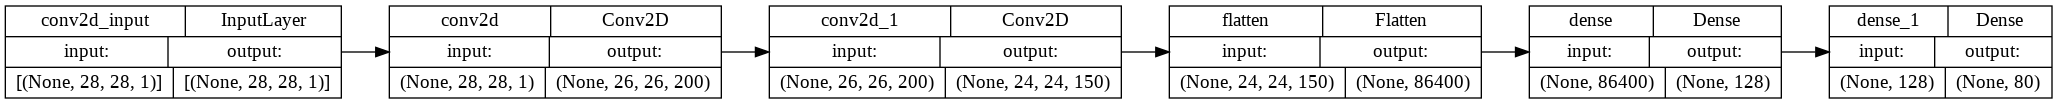

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True,rankdir='LR')

In [ ]:
from keras.optimizers import Adam
optimizer = Adam(learning_rate =0.0001)
model.compile(loss='categorical_crossentropy',optimizer = optimizer,metrics= ['accuracy'])

In [ ]:
from keras.utils import to_categorical
Y_label = to_categorical(Y_label)
print(Y_label)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_data,Y_label,test_size=0.3,shuffle=True)

In [ ]:
from keras.callbacks import EarlyStopping,ModelCheckpoint
es =EarlyStopping(monitor='val_loss', patience=15)
mcp_save = ModelCheckpoint('trained_model_CNN_80.h5', save_best_only=True, monitor='val_loss', mode='min')

In [ ]:

history = model.fit(X_train,Y_train, epochs = 500, batch_size = 128, validation_data=[X_test,Y_test],callbacks=[es,mcp_save])

Epoch 1/500
2625/2625 [==============================] - 54s 17ms/step - loss: 1.7065 - accuracy: 0.6034 - val_loss: 1.1676 - val_accuracy: 0.7224
Epoch 2/500
2625/2625 [==============================] - 42s 16ms/step - loss: 1.0431 - accuracy: 0.7534 - val_loss: 1.0016 - val_accuracy: 0.7622
Epoch 3/500
2625/2625 [==============================] - 43s 16ms/step - loss: 0.9115 - accuracy: 0.7845 - val_loss: 0.9261 - val_accuracy: 0.7798
Epoch 4/500
2625/2625 [==============================] - 42s 16ms/step - loss: 0.8360 - accuracy: 0.8026 - val_loss: 0.8709 - val_accuracy: 0.7929
Epoch 5/500
2625/2625 [==============================] - 42s 16ms/step - loss: 0.7836 - accuracy: 0.8147 - val_loss: 0.8366 - val_accuracy: 0.8022
Epoch 6/500
2625/2625 [==============================] - 42s 16ms/step - loss: 0.7459 - accuracy: 0.8237 - val_loss: 0.8096 - val_accuracy: 0.8082
Epoch 7/500
2625/2625 [==============================] - 43s 16ms/step - loss: 0.7147 - accuracy: 0.8312 - val_loss: 0

In [ ]:
model.save("trained_model_CNN_80_1.h5")

0.8281388878822327


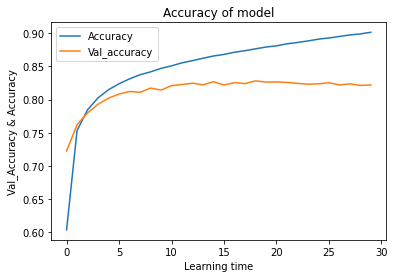

In [ ]:
import matplotlib.pyplot as plt
print(max(history.history['val_accuracy']))

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Accuracy of model")
plt.ylabel("Val_Accuracy & Accuracy")
plt.xlabel("Learning time")
plt.legend(["Accuracy","Val_accuracy"])

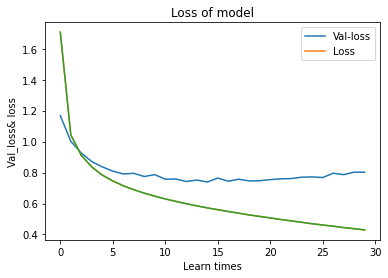

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history["val_loss"])
plt.plot(history.history["loss"])
plt.plot(history.history["loss"])
plt.title("Loss of model")
plt.ylabel("Val_loss& loss")
plt.xlabel("Learn times")
plt.legend(["Val-loss","Loss"])

In [ ]:
hjhjjj
jj
gg
jjj
hhjj
ff
kk
jjj
hh
hhh 
kkk